In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR_comma_sep.csv', delimiter=',')    # Reading the data

In [3]:
data.head()    # Show top 5 rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.describe()    # Describing the data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.isnull().values.any()    # Check if data has any NaN values

False

In [7]:
data[data['left']==1].shape[0]    # Number of employees that left

3571

In [8]:
data[data['left']==0].shape[0]    # Number of employees that are still working there

11428

In [9]:
group_a = data[data['left']==1].mean()    # Divide working employees and those who left in different groups
print(group_a)

satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64


In [10]:
group_b = data[data['left']==0].mean()
print(group_b)

satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64


In [11]:
print("Average monthly hours of employees that left: ", group_a['average_montly_hours'])
print("Average monthly hours of employees that are still working: ", group_b['average_montly_hours'])

Average monthly hours of employees that left:  207.419210305
Average monthly hours of employees that are still working:  199.06020301


In [12]:
print("Average promotion in last 5 years of employees that left: ", group_a['promotion_last_5years'])
print("Average promotion in last 5 years of employees that are still working: ", group_b['promotion_last_5years'])

Average promotion in last 5 years of employees that left:  0.00532063847662
Average promotion in last 5 years of employees that are still working:  0.0262513125656


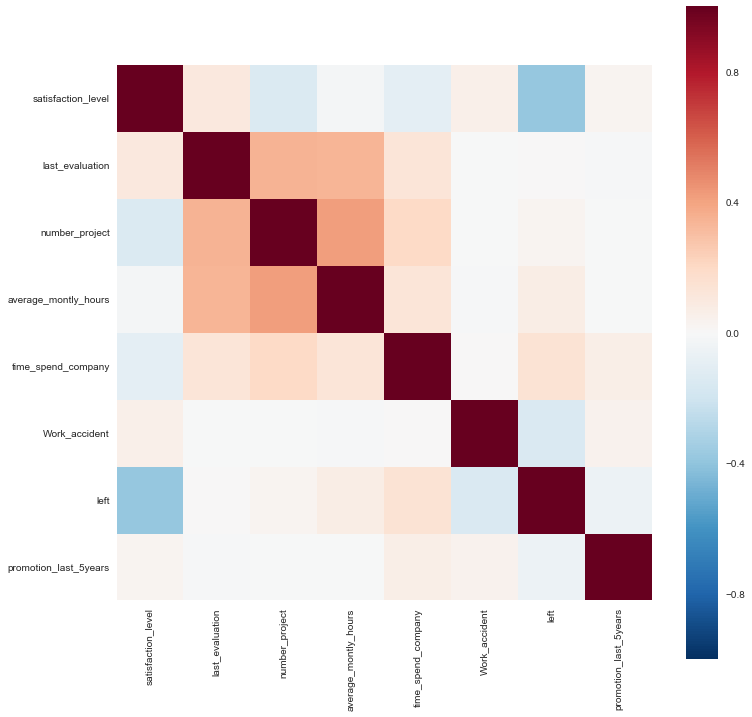

In [13]:
# Creating the heatmap of correlation matrix
corr = data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True)
plt.show()

In [14]:
corr # Printing the correlation matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


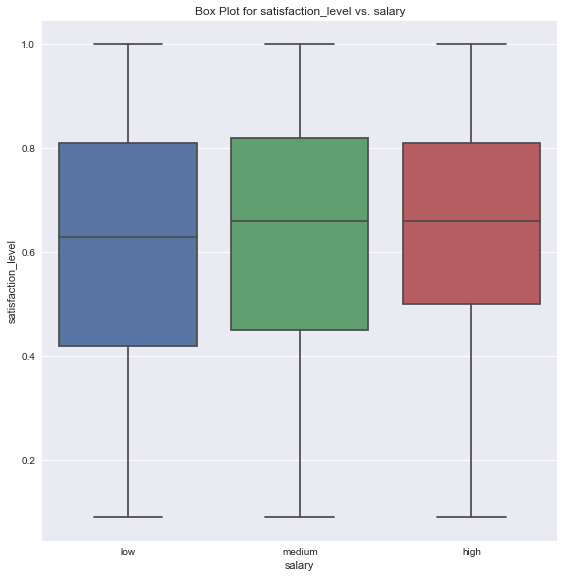

In [15]:
sns.factorplot(data=data, x='salary', y='satisfaction_level', kind='box', size=8)
plt.title('Box Plot for satisfaction_level vs. salary')
plt.show()

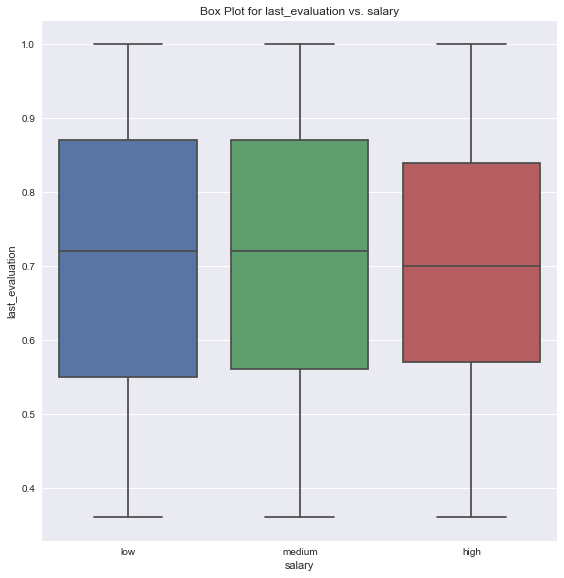

In [16]:
sns.factorplot(data=data, x='salary', y='last_evaluation', kind='box', size=8)
plt.title('Box Plot for last_evaluation vs. salary')
plt.show()

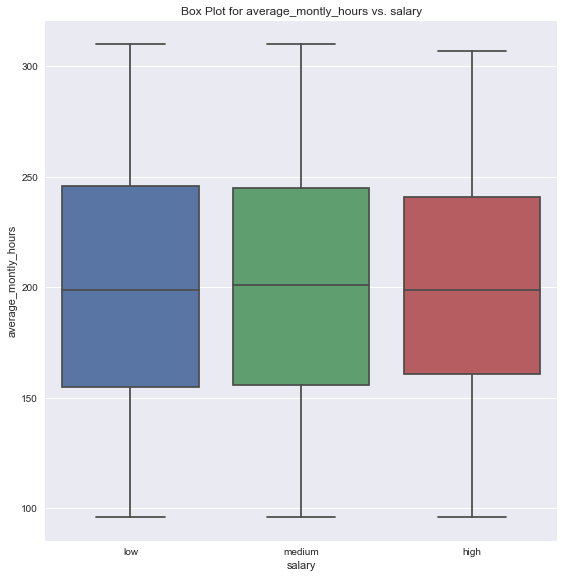

In [17]:
sns.factorplot(data=data, x='salary', y='average_montly_hours', kind='box', size=8)
plt.title('Box Plot for average_montly_hours vs. salary')
plt.show()

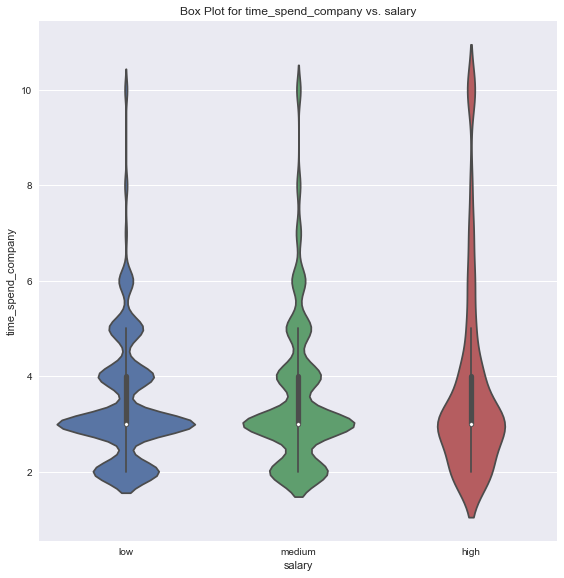

In [18]:
sns.factorplot(data=data, x='salary', y='time_spend_company', kind='violin', size=8)
plt.title('Box Plot for time_spend_company vs. salary')
plt.show()

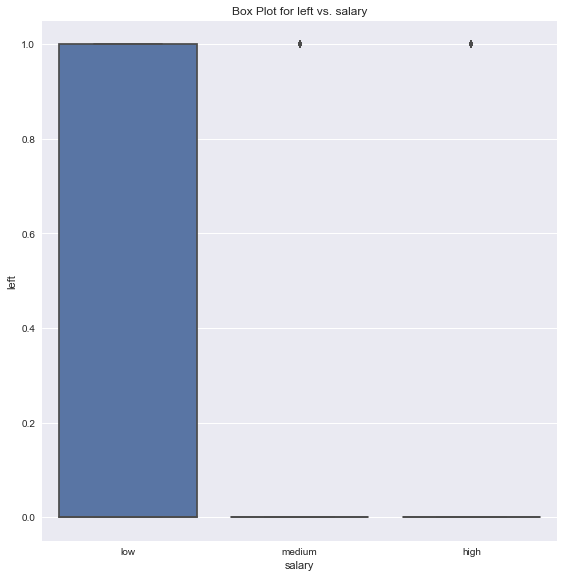

In [19]:
sns.factorplot(data=data, x='salary', y='left', kind='box', size=8)
plt.title('Box Plot for left vs. salary')
plt.show()

In [20]:
print('So, from the plots we can see that most of the employees that left the company left because of the salary, average_montly_hours, satisfaction_level, and last_evaluation')

So, from the plots we can see that most of the employees that left the company left because of the salary, average_montly_hours, satisfaction_level, and last_evaluation


In [21]:
df = pd.DataFrame(data)
df2 = pd.get_dummies(df['salary'], prefix="salary", prefix_sep="_", drop_first=True)
df3 = pd.concat([df,df2], axis=1)
df3.drop('salary', axis=1, inplace=True)
df3.drop('sales', axis=1, inplace=True)
df3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


In [22]:
X = df3.loc[:, df3.columns != 'left']
Y = df3.loc[:, df3.columns == 'left']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [23]:
clf = RandomForestClassifier()

In [24]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [25]:
pred = clf.predict(X_test)

In [26]:
acc = accuracy_score(Y_test, pred)

In [27]:
print("Accuracy of the algorithm: ", acc)
print("Total number of employees which are likely to leave: ", sum(pred))

Accuracy of the algorithm:  0.988222222222
Total number of employees which are likely to leave:  1056


In [28]:
df4 = df3[df3['left']==0]
df4.drop('left', axis=1, inplace=True)
a = df4.values

prob = clf.predict_proba(a)
prob

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [29]:
print('Number of employees that will definitely leave: ', sum(prob[:, 1]==1))

Number of employees that will definitely leave:  5


In [30]:
df4['SoonLeave'] = prob[:, 1]
df4[df4['SoonLeave'] > 0.5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,SoonLeave
2095,0.54,0.67,4,282,6,0,0,0,1,0.7
5565,0.84,0.84,6,261,5,0,0,1,0,0.7
5847,0.77,0.85,5,221,5,0,0,1,0,1.0
6184,0.93,0.70,5,206,4,0,0,1,0,0.7
6358,0.81,0.98,5,243,6,0,0,0,1,1.0
6466,0.39,0.57,2,132,3,0,0,1,0,1.0
7004,0.85,0.87,6,232,6,0,0,1,0,0.7
7762,0.82,0.87,5,273,6,0,0,0,1,1.0
9781,0.42,0.50,2,151,3,0,0,1,0,1.0
9913,0.42,0.58,2,140,3,0,0,1,0,0.6


In [31]:
soonleave = sum(prob[:, 1] > 0.5)
soonleave
print('So, ' + str(soonleave) + ' employees will soon leave the company.')

So, 12 employees will soon leave the company.
